In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing = pd.read_csv('datasets/kc_house_data.csv')
housing.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2090,3448000270,3/13/2015,398500.0,3,1.00,1200,15960,1.5,0,0,...,6,1200,0,1945,0,98125,47.7163,-122.299,1120,7800
2581,5040800060,2/4/2015,675000.0,3,1.75,1710,5913,1.0,0,0,...,8,1120,590,1941,0,98199,47.6481,-122.406,2920,5922
6005,2316400285,5/13/2015,495000.0,4,3.50,2490,18042,2.0,0,0,...,8,2490,0,2003,0,98070,47.4161,-122.441,1960,21107
14468,6909700205,4/6/2015,425000.0,2,1.00,1090,6000,1.0,0,0,...,7,1090,0,1922,0,98144,47.5886,-122.292,1960,5000
19765,2867300160,9/4/2014,450000.0,5,3.50,3931,9497,2.0,0,0,...,10,2650,1281,2014,0,98023,47.3008,-122.386,3510,9497


In [3]:
housing.shape

(21597, 21)

In [4]:
housing.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
housing = housing.drop({'id', 'date', 'zipcode'}, axis= 1)

housing['age'] = 2020 - housing['yr_built']
housing = housing.drop('yr_built', axis= 1)

housing['renovated'] = housing['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
housing = housing.drop('yr_renovated', axis= 1)

housing.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,age,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,47.5112,-122.257,1340,5650,65,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,47.7210,-122.319,1690,7639,69,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,47.7379,-122.233,2720,8062,87,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,47.5208,-122.393,1360,5000,55,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,47.6168,-122.045,1800,7503,33,0


In [6]:
housing.to_csv('datasets/kc_housesale.csv', index= False)

In [7]:
housing.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,age,renovated
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,47.560093,-122.213982,1986.620318,12758.283512,49.000324,0.042321
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,0.138552,0.140724,685.230472,27274.441950,29.375234,0.201324
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,5.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,47.471100,-122.328000,1490.000000,5100.000000,23.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,47.571800,-122.231000,1840.000000,7620.000000,45.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,47.678000,-122.125000,2360.000000,10083.000000,69.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,47.777600,-121.315000,6210.000000,871200.000000,120.000000,1.000000


Text(0, 0.5, 'no. of bathrooms')

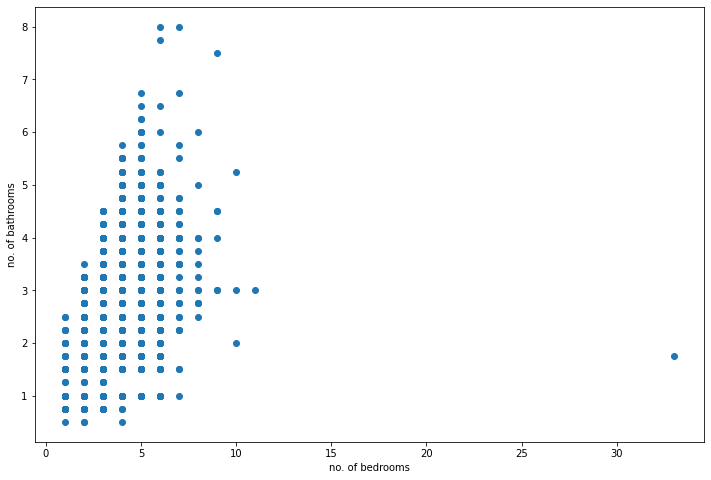

In [8]:
fig, ax = plt.subplots(figsize= (12, 8))
plt.scatter(housing['bedrooms'], housing['bathrooms'])
plt.xlabel('no. of bedrooms')
plt.ylabel('no. of bathrooms')

Text(0, 0.5, 'price')

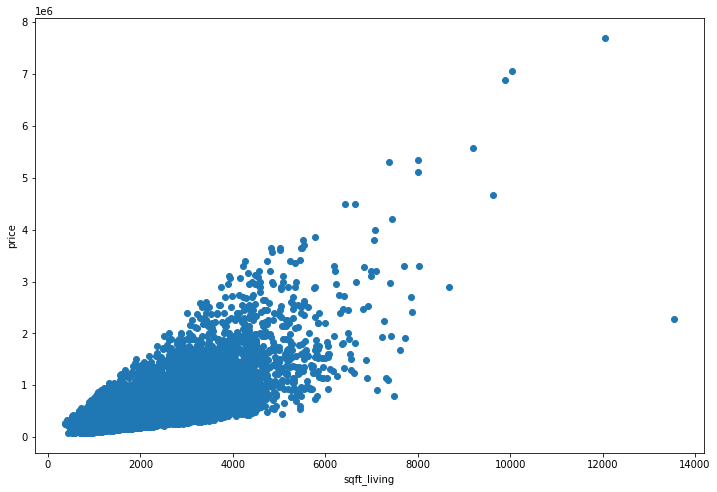

In [9]:
fig, ax = plt.subplots(figsize= (12, 8))
plt.scatter(housing['sqft_living'], housing['price'])
plt.xlabel('sqft_living')
plt.ylabel('price')

Text(0, 0.5, 'price')

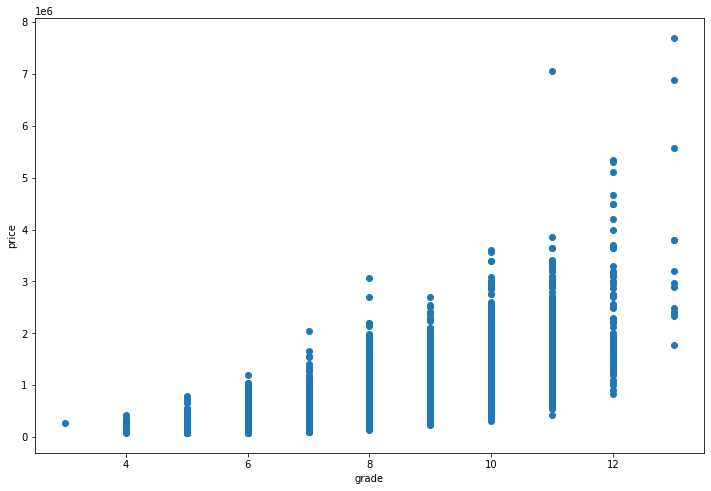

In [10]:
fig, ax = plt.subplots(figsize= (12, 8))
plt.scatter(housing['grade'], housing['price'])
plt.xlabel('grade')
plt.ylabel('price')

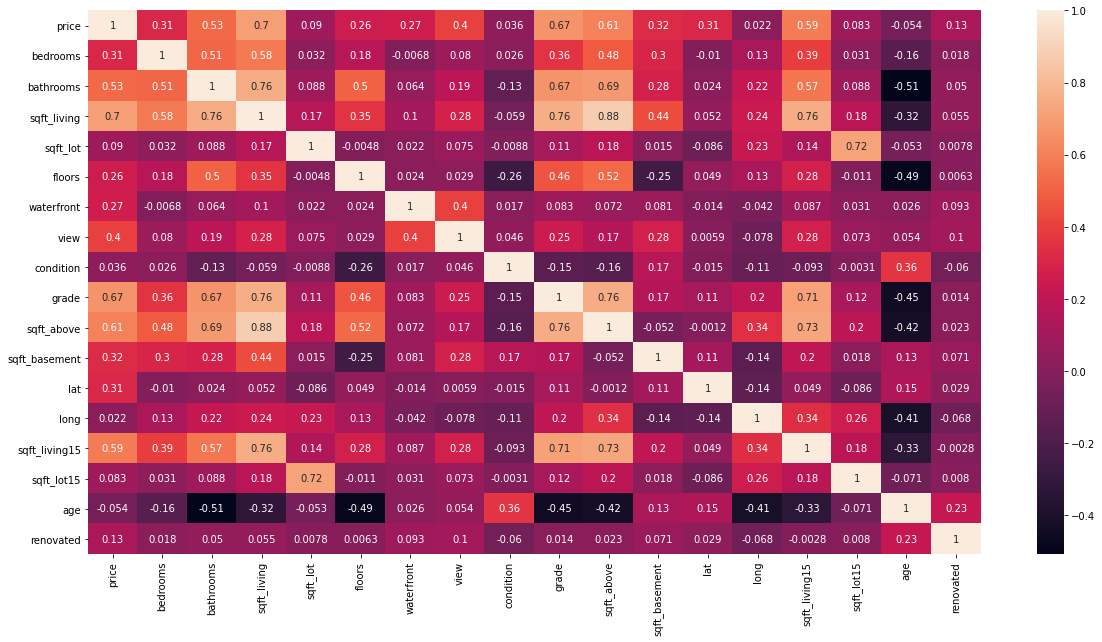

In [11]:
housing_corr = housing.corr()
fig, ax = plt.subplots(figsize= (20,10))
sns.heatmap(housing_corr, annot= True)

In [12]:
from sklearn.model_selection import train_test_split

X = housing.drop('price', axis= 1).astype(float)
Y = housing['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2)

In [13]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression().fit(x_train, y_train)
print('training score: ', linear_model.score(x_train, y_train))

training score:  0.6996400782658604


In [14]:
predictors = x_train.columns
coef = pd.Series(linear_model.coef_, predictors).sort_values()
print(coef)

long            -111693.104958
bedrooms         -29339.646772
sqft_lot15           -0.406350
sqft_lot              0.144080
sqft_basement        32.311030
sqft_living15        33.641651
sqft_above           67.283427
sqft_living          99.594457
age                2396.122922
floors             3443.111663
condition         31626.176861
bathrooms         39668.757208
renovated         50484.238922
view              53391.843551
grade             98440.353572
lat              557766.302674
waterfront       589815.246790
dtype: float64


In [15]:
y_pred = linear_model.predict(x_test)

from sklearn.metrics import r2_score
print('testing score= ', r2_score(y_test, y_pred))

testing score=  0.6807095933783096


In [16]:
import statsmodels.api as sm

x_train_const = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train_const)
result = model.fit()

In [17]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     2513.
Date:                Mon, 24 Aug 2020   Prob (F-statistic):               0.00
Time:                        16:29:08   Log-Likelihood:            -2.3522e+05
No. Observations:               17277   AIC:                         4.705e+05
Df Residuals:                   17260   BIC:                         4.706e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.103e+07   1.69e+06    -24.336

### Univariate linear regression tests

**the correlation between each variable and the target is calculated- converted to an F-score and P- value which tells us how significant that variable is**

In [18]:
from sklearn.feature_selection import f_regression, SelectKBest

select_fe = SelectKBest(f_regression, k= 3)
X_new = select_fe.fit_transform(X, Y)
X_new.shape

(21597, 3)

In [19]:
X_new = pd.DataFrame(X_new)
X_new.head()

,0,1,2
0,1180.0,7.0,1180.0
1,2570.0,7.0,2170.0
2,770.0,6.0,770.0
3,1960.0,7.0,1050.0
4,1680.0,8.0,1680.0


In [20]:
selected_fe= []

for i in range(len(X_new.columns)):
    for j in range(len(X.columns)):
        if(X_new.iloc[:,i].equals( X.iloc[:,j])):
            selected_fe.append(X.columns[j])        
selected_fe

['sqft_living', 'grade', 'sqft_above']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X_new, Y, test_size= 0.2)
model = sm.OLS(y_train, x_train)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.838
Model:                            OLS   Adj. R-squared (uncentered):              0.838
Method:                 Least Squares   F-statistic:                          2.988e+04
Date:                Mon, 24 Aug 2020   Prob (F-statistic):                        0.00
Time:                        16:29:08   Log-Likelihood:                     -2.4011e+05
No. Observations:               17277   AIC:                                  4.802e+05
Df Residuals:                   17274   BIC:                                  4.802e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [22]:
import pylab

In [23]:
features = list(housing.columns[1:18])
features

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'age',
 'renovated']

In [24]:
def build_model(regression, target,
                features, dataset,
                preprocess_fn, *hyperparameters):
    X = dataset[features]
    Y = dataset[target]
    
    X = preprocess_fn(X, Y, *hyperparameters)
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2)
    
    model = regression(x_train, y_train)
    y_pred = model.predict(x_test)
    
    return{
        'x_train': x_train,
        'x_test': x_test,
        'y_train': y_train,
        'y_test':y_test,
        'y_pred': y_pred,
        'model': model
    }

In [25]:
def compare_results(result_dict):
    
    for key in result_dict:
        print('test: ', key)
        print('R-squared: ',result_dict[key]['rsquared'])
        print('Adjusted R-squared: ', result_dict[key]['adj_rsquared'])
        print()
        
    n_components = list(range(1,18))
    reg_score = [result_dict[key]['adj_rsquared'] for key in result_dict]
    
    plt.figure(figsize= (12,10))
    plt.plot(n_components, reg_score)
    pylab.ylim([0,1])
    
    plt.xlabel('n components')
    plt.ylabel('adj_rsquared');

In [26]:
def get_model_score(model_params):
    
    result_dict= {}
    for key in model_params:
        result_dict[key]= {
            'rsquared': model_params[key]['model'].rsquared,
            'adj_rsquared': model_params[key]['model'].rsquared_adj
        }
    compare_results(result_dict)

In [27]:
def ols_reg(x_train, y_train):
    ols = sm.OLS(y_train, x_train)
    model = ols.fit()
    return model

In [28]:
def apply_f_regression(x,y,k,add_constant= False):
    select_fe = SelectKBest(f_regression, k=k)
    x_new = select_fe.fit_transform(x,y)
    
    if add_constant is True:
        x_new = sm.add_constant(x_new)
    return pd.DataFrame(x_new)

In [29]:
model_params= {}

for i in range(1,18):
    model_params['f_regression- k:' + str(i)] = build_model(ols_reg,
                                                            'price',
                                                            features,
                                                            housing,
                                                            apply_f_regression,
                                                            i,
                                                            True)
    

test:  f_regression- k:1
R-squared:  0.4925618047180127
Adjusted R-squared:  0.49253243058225105

test:  f_regression- k:2
R-squared:  0.5349680826167462
Adjusted R-squared:  0.5349142407830791

test:  f_regression- k:3
R-squared:  0.5386635032587578
Adjusted R-squared:  0.5385833776586753

test:  f_regression- k:4
R-squared:  0.5417034123169853
Adjusted R-squared:  0.5415972760067298

test:  f_regression- k:5
R-squared:  0.5440643737741107
Adjusted R-squared:  0.5439323792091677

test:  f_regression- k:6
R-squared:  0.5760800480000077
Adjusted R-squared:  0.5759327683409458

test:  f_regression- k:7
R-squared:  0.5752342465891673
Adjusted R-squared:  0.5750866730790073

test:  f_regression- k:8
R-squared:  0.5814039506094442
Adjusted R-squared:  0.5812342724378226

test:  f_regression- k:9
R-squared:  0.6394222542116521
Adjusted R-squared:  0.6392552040630357

test:  f_regression- k:10
R-squared:  0.6602789404132474
Adjusted R-squared:  0.6601018691480433

test:  f_regression- k:11
R-

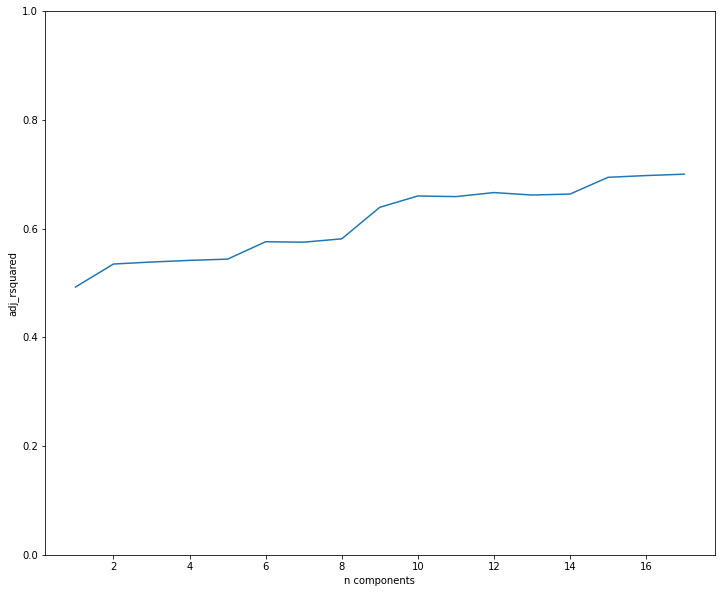

In [30]:
get_model_score(model_params)

In [31]:
def linear_reg(x_train, y_train):
    model = LinearRegression().fit(x_train, y_train)
    return model

In [32]:
sklearn_model = {}
sklearn_model['f_regression'] = build_model(linear_reg,
                                            'price',
                                            features,
                                            housing,
                                            apply_f_regression,
                                            9)

model = sklearn_model['f_regression']['model']
x_train = sklearn_model['f_regression']['x_train']
x_test = sklearn_model['f_regression']['x_test']
y_train = sklearn_model['f_regression']['y_train']
y_test = sklearn_model['f_regression']['y_test']
y_pred = sklearn_model['f_regression']['y_pred']

print('training score= ', model.score(x_train, y_train))
print('testing score= ', r2_score(y_test, y_pred))

training score=  0.6410316132115152
testing score=  0.6357847960034024


### mutual info regression

In [33]:
from sklearn.feature_selection import mutual_info_regression

def apply_mutual_info_reg(x, y, k, add_constant= False):
    select_fe = SelectKBest(mutual_info_regression, k= k)
    x_new = select_fe.fit_transform(x, y)
    
    if add_constant is True:
        x_new = sm.add_constant(x_new)
        
    return pd.DataFrame(x_new)

test:  mutual_info_reg- k:1
R-squared:  0.4359126364366894
Adjusted R-squared:  0.435879983043719

test:  mutual_info_reg- k:2
R-squared:  0.5702058089392954
Adjusted R-squared:  0.570156046962792

test:  mutual_info_reg- k:3
R-squared:  0.5981962322719774
Adjusted R-squared:  0.5981264464036751

test:  mutual_info_reg- k:4
R-squared:  0.597951965227111
Adjusted R-squared:  0.5978588554460149

test:  mutual_info_reg- k:5
R-squared:  0.6005785580558392
Adjusted R-squared:  0.6004629244961309

test:  mutual_info_reg- k:6
R-squared:  0.6026157143247532
Adjusted R-squared:  0.6024776537738528

test:  mutual_info_reg- k:7
R-squared:  0.6103467905619108
Adjusted R-squared:  0.6101888443886485

test:  mutual_info_reg- k:8
R-squared:  0.6165234020131785
Adjusted R-squared:  0.6163457431769557

test:  mutual_info_reg- k:9
R-squared:  0.6246667410961153
Adjusted R-squared:  0.6244711078459773

test:  mutual_info_reg- k:10
R-squared:  0.6555610149970608
Adjusted R-squared:  0.6553615252571077

te

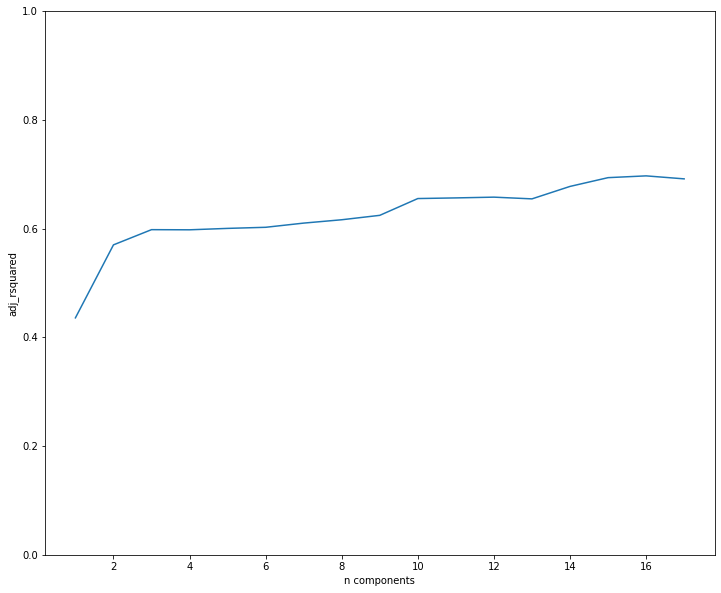

In [34]:
model_params = {}
for i in range(1,18):
    model_params['mutual_info_reg- k:' + str(i)] = build_model(ols_reg,
                                                                'price',
                                                                features,
                                                                housing,
                                                                apply_mutual_info_reg,
                                                                i,
                                                                True)
get_model_score(model_params)    

In [36]:
sklearn_model = {}
sklearn_model['mutual_info_reg'] = build_model(linear_reg,
                                                'price',
                                                features,
                                                housing,
                                                apply_mutual_info_reg,
                                                4)

model = sklearn_model['mutual_info_reg']['model']
x_train = sklearn_model['mutual_info_reg']['x_train']
x_test = sklearn_model['mutual_info_reg']['x_test']
y_train = sklearn_model['mutual_info_reg']['y_train']
y_test = sklearn_model['mutual_info_reg']['y_test']
y_pred = sklearn_model['mutual_info_reg']['y_pred']

print('training score= ', model.score(x_train, y_train))
print('testing score= ', r2_score(y_test, y_pred))

training score=  0.6009912631134738
testing score=  0.5828518055245906
